<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** Bryan Azahel Juárez Pineda.

**Fecha:** 10 de febrero del 2021.

**Expediente** : 722176.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 2: Clase 4.

[Liga al repositorio](https://github.com/Bryan722176/ProyectoConjuntoBAJuarez_FJBarragan)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
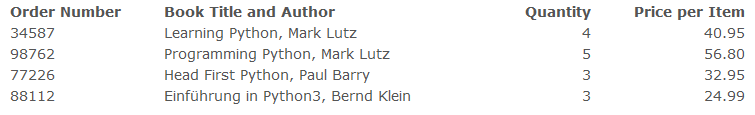
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`

### _Solución Bryan._

In [1]:
# Datos a utilizar
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]
orders

[['34587', 'Learning Python, Mark Lutz', 4, 40.95],
 ['98762', 'Programming Python, Mark Lutz', 5, 56.8],
 ['77226', 'Head First Python, Paul Barry', 3, 32.95],
 ['88112', 'Einführung in Python3, Bernd Klein', 3, 24.99]]

In [2]:
lista_cont = list(map(lambda l: [l[0], l[2]*l[3]] if l[2]*l[3]>100 else [l[0], (l[2]*l[3])+10], orders))
lista_cont

[['34587', 163.8],
 ['98762', 284.0],
 ['77226', 108.85000000000001],
 ['88112', 84.97]]

2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.

### _Solución Bryan._

In [3]:
# Importamos función reduce.
from functools import reduce

In [4]:
# Datos
orders2 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]
orders2

[[1, ('5464', 4, 9.99), ('8274', 18, 12.99), ('9744', 9, 44.95)],
 [2, ('5464', 9, 9.99), ('9744', 9, 44.95)],
 [3, ('5464', 9, 9.99), ('88112', 11, 24.99)],
 [4, ('8732', 7, 11.99), ('7733', 11, 18.99), ('88112', 5, 39.95)]]

In [5]:
lista_nueva = list(map(lambda x: (x[0], reduce(lambda x,y: x+y, list(map(lambda y: y[1]*y[2] if y[1]*y[2] > 100
                                                                         else y[1]*y[2]+10, x[1:])))), orders2))
lista_nueva

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

### _Solución Bryan._

Empezamos con la solución del **ejercicio 1.**

In [23]:
# Primero importamos pandas.
import pandas as pd

In [7]:
# Ahora el primer paso es convertir nuestra lista a un data frame.
df1 = pd.DataFrame(orders)
df1

,0,1,2,3
0,34587,"Learning Python, Mark Lutz",4,40.95
1,98762,"Programming Python, Mark Lutz",5,56.80
2,77226,"Head First Python, Paul Barry",3,32.95
3,88112,"Einführung in Python3, Bernd Klein",3,24.99


In [8]:
# Solución, se propone una compresión de listas.
df1_sol = [[df1.iloc[i,0], df1.iloc[i,2]*df1.iloc[i,3]] if df1.iloc[i,2]*df1.iloc[i,3]>100 
                                              else [df1.iloc[i,0], df1.iloc[i,2]*df1.iloc[i,3]+10] for i in df1]
df1_sol

[['34587', 163.8],
 ['98762', 284.0],
 ['77226', 108.85000000000001],
 ['88112', 84.97]]

Ahora proseguimos con la solución del **ejercicio 2.**

In [25]:
# Definimos una funcion que nos regrese los valores buscados.
def total_note(data):
    return list(map(lambda x: (x[0], reduce(lambda x,y: x+y, list(map(lambda y: y[1]*y[2] if y[1]*y[2] > 100
                                                                         else y[1]*y[2]+10, x[1:])))), orders2))

# Definimos nuestro dataframe.
df = pd.DataFrame(orders2)

# Aplicamos nuestra función al data frame.
result = list(df.apply(total_note)[0])
result

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

4. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

### _Solución Bryan._

In [9]:
# Definimos el texto a utilizar.
text = 'the notion of a lambda function goes all the way back to the origin of computer science'

# Uso de la función filter().
cadena_final = list(filter(lambda word: True if len(word) >= 4 else False, list(text.split())))
cadena_final

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

5. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

### _Solución Bryan._

In [10]:
# Datos.
import numpy as np
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)

[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


In [11]:
# Definimos los valores de temperaturas en el rango específicado.
temperaturas = list(filter(lambda temp: True if 32<=temp<=80 else False, temperatures))
temperaturas

[35.97387961379455,
 63.211195349983264,
 73.90387696517755,
 36.982512376595906,
 68.75395211338406,
 45.86132066984196,
 36.58307493022292,
 56.322083650154724,
 33.9621930206693,
 45.29071317816652,
 74.86289938282341,
 66.51091382521807,
 46.831316244170544,
 44.55796498523391]

In [12]:
# Ahora calculamos el porcentaje de temperaturas en el rango.
len(temperaturas) / len(temperatures)

0.4666666666666667

6. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

### _Solución Bryan._

In [13]:
# Datos
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)

[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


In [14]:
# Importamos librerías.
import numpy as np

In [15]:
# Uso del comando np.minimum.reduce().
reduccion = np.minimum.reduce(point_xy)
reduccion

array([0, 2])

#### Ejercicio: Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

#### Resolverlo de manera vectorizada


In [21]:
# Importamos librerias.
import scipy.special as sps
import matplotlib.pyplot as plt

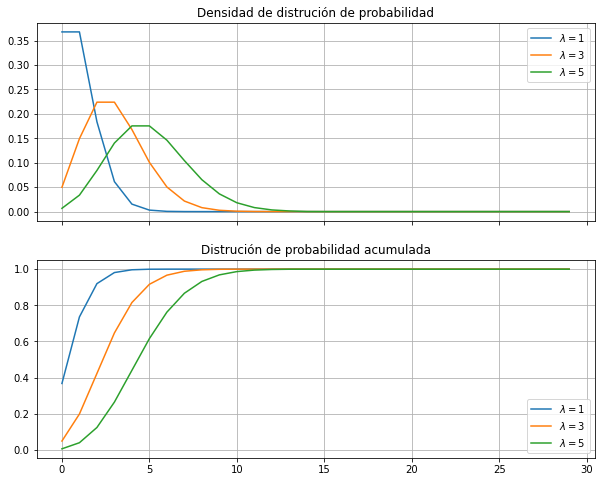

In [22]:
N = 30
l = [1, 3, 5]
k = np.arange(N)
p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)
# Graficar para todo l una gráfica de p(k) usando subplots (como matrices)
# Comenzamos definiendo nuestra matriz con las evaluaciones de p(k) en cada punto k.
matrix = [p(k, lam) for lam in l]
matrix = np.array(matrix)

# Comenzamos a definir los subplots.
fig, ax = plt.subplots(2,1, figsize=[10,8], sharex=True)

# Propiedades para el primer gráfico, densidad de distribución de probabilidad.
ax[0].plot(k, matrix.T);
ax[0].title.set_text('Densidad de distrución de probabilidad')
ax[0].grid()
ax[0].legend([f'$\\lambda={lam}$' for lam in l])

# Propiedades para el segundo gráfico, distribución de probabilidad acumulada.
ax[1].plot(k, np.cumsum(matrix.T, axis=0));
ax[1].title.set_text('Distrución de probabilidad acumulada')
ax[1].grid()
ax[1].legend([f'$\\lambda={lam}$' for lam in l])